In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahpre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahpre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahpre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = "MN-DS-news-classification.csv"

In [3]:
news = pd.read_csv(data)
news

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_level_1,category_level_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,907640,therussophileorg--2019-12-15--Iran to build ov...,2019-12-15,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"Sun, 15 Dec 2019 10:42:50 +0000",1576424570,1576413702,"conflict, war and peace",post-war reconstruction
10913,892720,therussophileorg--2019-10-12--Ukraine has no m...,2019-10-12,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"Sat, 12 Oct 2019 20:56:01 +0000",1570928161,1570922006,"conflict, war and peace",post-war reconstruction
10914,870499,therussophileorg--2019-07-06--Irans contributi...,2019-07-06,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,2019-07-06 17:51:38+00:00,1562449898,1567536625,"conflict, war and peace",post-war reconstruction
10915,887334,therussophileorg--2019-09-25--Iraqi president ...,2019-09-25,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,2019-09-25 16:58:01+00:00,1569445081,1570222223,"conflict, war and peace",post-war reconstruction


In [4]:
news.head()

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_level_1,category_level_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime


In [5]:
news.describe()

,data_id,published_utc,collection_utc
count,1.091700e+04,1.091700e+04,1.091700e+04
mean,4.021572e+05,1.561366e+09,1.569553e+09
std,3.256031e+05,1.006019e+07,3.204243e+06
min,1.000000e+00,1.546320e+09,1.567533e+09
25%,1.115080e+05,1.552363e+09,1.567542e+09
50%,3.367480e+05,1.561085e+09,1.567550e+09
75%,6.507910e+05,1.570736e+09,1.570759e+09
max,1.117165e+06,1.577766e+09,1.584099e+09


In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10917 entries, 0 to 10916
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_id           10917 non-null  int64 
 1   id                10917 non-null  object
 2   date              10917 non-null  object
 3   source            10917 non-null  object
 4   title             10917 non-null  object
 5   content           10917 non-null  object
 6   author            7605 non-null   object
 7   url               10917 non-null  object
 8   published         10917 non-null  object
 9   published_utc     10917 non-null  int64 
 10  collection_utc    10917 non-null  int64 
 11  category_level_1  10917 non-null  object
 12  category_level_2  10917 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [7]:
news["category_level_1"].value_counts()


category_level_1
society                                      1100
sport                                         907
politics                                      900
conflict, war and peace                       800
religion and belief                           800
science and technology                        800
labour                                        703
health                                        700
education                                     607
environment                                   600
human interest                                600
crime, law and justice                        500
disaster, accident and emergency incident     500
weather                                       400
economy, business and finance                 400
arts, culture, entertainment and media        300
lifestyle and leisure                         300
Name: count, dtype: int64

In [8]:
df = pd.read_csv(data, usecols=["content", "category_level_1","category_level_2"])

In [9]:
df.head()

,content,category_level_1,category_level_2
0,The Virginia woman whose 2-year-old son was fo...,"crime, law and justice",crime
1,Authorities are trying to determine if anyone ...,"crime, law and justice",crime
2,A 13-year-old suspect in a double homicide who...,"crime, law and justice",crime
3,The mother of two young children found hanging...,"crime, law and justice",crime
4,"""One family member said Derek “can be violent ...","crime, law and justice",crime


In [10]:
# Get unique categories and their counts for category_level_1
category1_counts = df['category_level_1'].value_counts()

# Print the unique categories and their counts
print(f"Total unique categories in category_level_1: {category1_counts.shape[0]}")
print("\nCategory Level 1 List and Counts:")
for category, count in category1_counts.items():
    print(f"- {category}: {count}")

Total unique categories in category_level_1: 17

Category Level 1 List and Counts:
- society: 1100
- sport: 907
- politics: 900
- conflict, war and peace: 800
- religion and belief: 800
- science and technology: 800
- labour: 703
- health: 700
- education: 607
- environment: 600
- human interest: 600
- crime, law and justice: 500
- disaster, accident and emergency incident: 500
- weather: 400
- economy, business and finance: 400
- arts, culture, entertainment and media: 300
- lifestyle and leisure: 300


In [11]:
# Get unique categories and their counts for category_level_1
category2_counts = df['category_level_2'].value_counts()

# Print the unique categories and their counts
print(f"Total unique categories in category_level_2: {category2_counts.shape[0]}")
print("\nCategory Level 2 List and Counts:")
for category, count in category2_counts.items():
    print(f"- {category}: {count}")
 

Total unique categories in category_level_2: 109

Category Level 2 List and Counts:
- transfer: 107
- vocational education: 106
- employment: 102
- school: 101
- labour market: 101
- act of terror: 100
- communities: 100
- post-war reconstruction: 100
- coup d'etat: 100
- weather forecast: 100
- prisoners of war: 100
- peace process: 100
- massacre: 100
- civil unrest: 100
- armed conflict: 100
- crime: 100
- sport event: 100
- social problem: 100
- bodybuilding: 100
- drug use in sport: 100
- family: 100
- discrimination: 100
- demographics: 100
- emigration: 100
- immigration: 100
- healthcare policy: 100
- health organisations: 100
- social sciences: 100
- welfare: 100
- values: 100
- scientific research: 100
- weather phenomena: 100
- emergency incident: 100
- scientific institution: 100
- religious institutions and state relations: 100
- political process: 100
- social condition: 100
- scientific standards: 100
- non-governmental organisation: 100
- government policy: 100
- mankin

C:\Users\ahpre\AppData\Local\Temp\ipykernel_41752\1623256735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


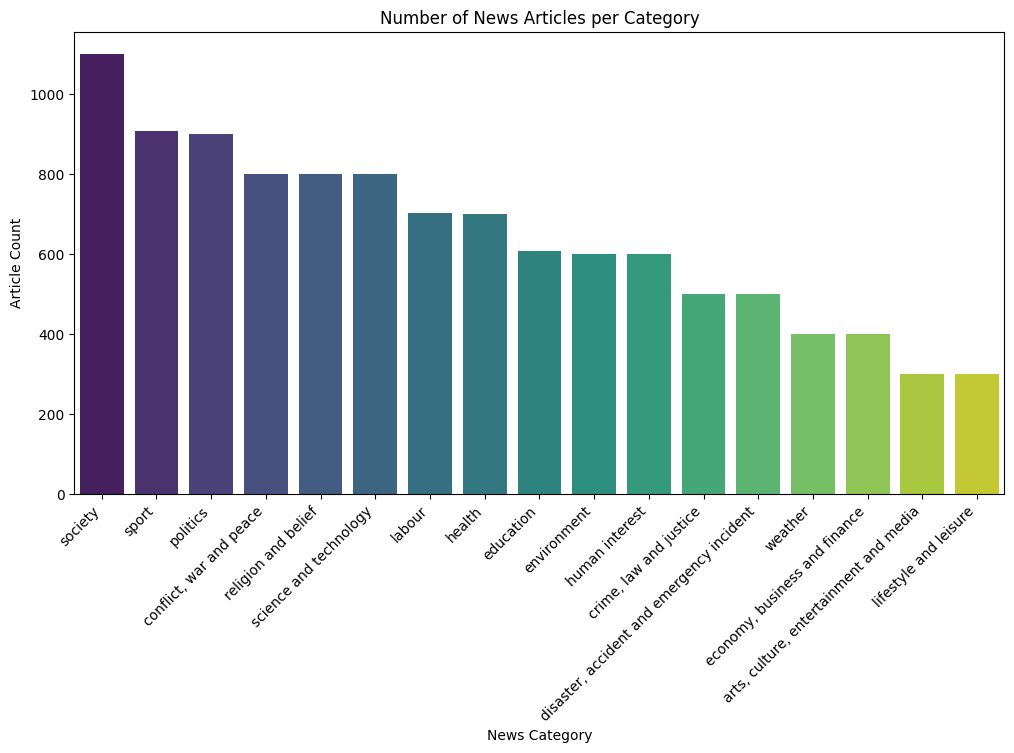

In [12]:
# Count the number of articles per category
category_counts = df["category_level_1"].value_counts()
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
# Customize the plot
plt.xticks(rotation=45, ha="right")
plt.xlabel("News Category")
plt.ylabel("Article Count")
plt.title("Number of News Articles per Category")
plt.show()

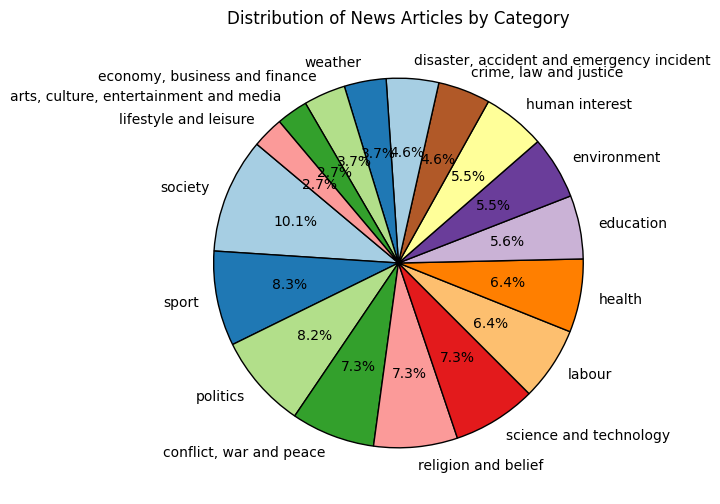

In [13]:
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", 
        startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title("Distribution of News Articles by Category")

# Show the plot
plt.show()

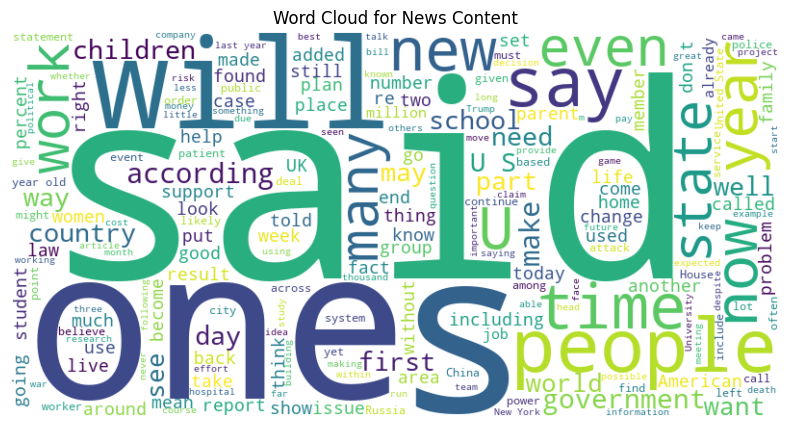

In [14]:
# Combine all text from the 'content' column
text = " ".join(df["content"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud for News Content")
plt.show()

In [15]:
content = df["content"]
content.head(10)

0    The Virginia woman whose 2-year-old son was fo...
1    Authorities are trying to determine if anyone ...
2    A 13-year-old suspect in a double homicide who...
3    The mother of two young children found hanging...
4    "One family member said Derek “can be violent ...
5    A white police officer who shot and killed an ...
6    Australian police on Wednesday charged an offi...
7    An Uber driver accused of killing six people a...
8    "Witchcraft" and "superstitious beliefs" are b...
9    Twenty-four shootings and five murders took pl...
Name: content, dtype: object

In [16]:
category1 = df["category_level_1"]
category1.head(10)

0    crime, law and justice
1    crime, law and justice
2    crime, law and justice
3    crime, law and justice
4    crime, law and justice
5    crime, law and justice
6    crime, law and justice
7    crime, law and justice
8    crime, law and justice
9    crime, law and justice
Name: category_level_1, dtype: object

In [17]:
category2 = df["category_level_2"]
category2.head(10)

0    crime
1    crime
2    crime
3    crime
4    crime
5    crime
6    crime
7    crime
8    crime
9    crime
Name: category_level_2, dtype: object

# remove all tags

In [18]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove,'',text)
# df["content"] = df["content"].apply(remove_tags)

# remove special characters

In [19]:
def special_characters(text):
    review = ''
    for i in text:
        if i.isalnum():  
            review += i 
        else:
            review += ''
    return review

# df["content"] = df["content"].apply(special_characters)


# Convert all of the content to lowercase

In [20]:
def lowercase(text):
    return text.lower()

df["content"] = df["content"].apply(lowercase)
df["content"][1]

'authorities are trying to determine if anyone helped two inmates who escaped from a california jail, traveled hundreds of miles and crossed into mexico before being captured trying to walk back into the united states.\n\njonathan salazar, 20, and santos fonseca, 21, were arrested by u.s. customs and border protection officials at a port of entry in san ysidro — the nation\'s largest border crossing — early wednesday, monterey county sheriff\'s office capt. john thornburg said.\n\nthornburg said the two are in the custody of monterey county officials and have been returned to a jail in salinas, a farming city of about 160,000 people roughly 100 miles (160 kilometers) south of san francisco.\n\nsalazar and fonseca escaped sunday from the lockup in salinas after climbing through a hole they made in the ceiling of a bathroom, squeezing through a hollow wall and kicking open a hatch. officials found their jail-issued jumpsuits outside the building. inmates often wear their own clothes unde

In [21]:
content.head(10)

0    The Virginia woman whose 2-year-old son was fo...
1    Authorities are trying to determine if anyone ...
2    A 13-year-old suspect in a double homicide who...
3    The mother of two young children found hanging...
4    "One family member said Derek “can be violent ...
5    A white police officer who shot and killed an ...
6    Australian police on Wednesday charged an offi...
7    An Uber driver accused of killing six people a...
8    "Witchcraft" and "superstitious beliefs" are b...
9    Twenty-four shootings and five murders took pl...
Name: content, dtype: object

In [22]:
df['content'].head(10)

0    the virginia woman whose 2-year-old son was fo...
1    authorities are trying to determine if anyone ...
2    a 13-year-old suspect in a double homicide who...
3    the mother of two young children found hanging...
4    "one family member said derek “can be violent ...
5    a white police officer who shot and killed an ...
6    australian police on wednesday charged an offi...
7    an uber driver accused of killing six people a...
8    "witchcraft" and "superstitious beliefs" are b...
9    twenty-four shootings and five murders took pl...
Name: content, dtype: object

# remove all stop words 

In [23]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
df["content"] = df["content"].apply(remove_stopwords)
df["content"][1]

['authorities',
 'trying',
 'determine',
 'anyone',
 'helped',
 'two',
 'inmates',
 'escaped',
 'california',
 'jail',
 ',',
 'traveled',
 'hundreds',
 'miles',
 'crossed',
 'mexico',
 'captured',
 'trying',
 'walk',
 'back',
 'united',
 'states',
 '.',
 'jonathan',
 'salazar',
 ',',
 '20',
 ',',
 'santos',
 'fonseca',
 ',',
 '21',
 ',',
 'arrested',
 'u.s.',
 'customs',
 'border',
 'protection',
 'officials',
 'port',
 'entry',
 'san',
 'ysidro',
 '—',
 'nation',
 "'s",
 'largest',
 'border',
 'crossing',
 '—',
 'early',
 'wednesday',
 ',',
 'monterey',
 'county',
 'sheriff',
 "'s",
 'office',
 'capt',
 '.',
 'john',
 'thornburg',
 'said',
 '.',
 'thornburg',
 'said',
 'two',
 'custody',
 'monterey',
 'county',
 'officials',
 'returned',
 'jail',
 'salinas',
 ',',
 'farming',
 'city',
 '160,000',
 'people',
 'roughly',
 '100',
 'miles',
 '(',
 '160',
 'kilometers',
 ')',
 'south',
 'san',
 'francisco',
 '.',
 'salazar',
 'fonseca',
 'escaped',
 'sunday',
 'lockup',
 'salinas',
 'climb

In [24]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['content'] = df['content'].apply(lemmatize_word)
df['content'][1]

"authority trying determine anyone helped two inmate escaped california jail , traveled hundred mile crossed mexico captured trying walk back united state . jonathan salazar , 20 , santos fonseca , 21 , arrested u.s. custom border protection official port entry san ysidro — nation 's largest border crossing — early wednesday , monterey county sheriff 's office capt . john thornburg said . thornburg said two custody monterey county official returned jail salina , farming city 160,000 people roughly 100 mile ( 160 kilometer ) south san francisco . salazar fonseca escaped sunday lockup salina climbing hole made ceiling bathroom , squeezing hollow wall kicking open hatch . official found jail-issued jumpsuit outside building . inmate often wear clothes jumpsuit , thornburg said . investigator yet determined long worked making hole anyone else helped escape helped . reported missing 8:15 a.m. sunday . thornburg said authority received tip pair , born raised salina , spotted mexican border c

In [25]:
content.head(10)

0    The Virginia woman whose 2-year-old son was fo...
1    Authorities are trying to determine if anyone ...
2    A 13-year-old suspect in a double homicide who...
3    The mother of two young children found hanging...
4    "One family member said Derek “can be violent ...
5    A white police officer who shot and killed an ...
6    Australian police on Wednesday charged an offi...
7    An Uber driver accused of killing six people a...
8    "Witchcraft" and "superstitious beliefs" are b...
9    Twenty-four shootings and five murders took pl...
Name: content, dtype: object

In [26]:
df["content"].head(10)

0    virginia woman whose 2-year-old son found tras...
1    authority trying determine anyone helped two i...
2    13-year-old suspect double homicide escaped cu...
3    mother two young child found hanging pennsylva...
4    `` one family member said derek “ violent atta...
5    white police officer shot killed african ameri...
6    australian police wednesday charged officer mu...
7    uber driver accused killing six people random ...
8    `` witchcraft '' `` superstitious belief '' bl...
9    twenty-four shooting five murder took place ac...
Name: content, dtype: object

In [27]:
df.head(10)

,content,category_level_1,category_level_2
0,virginia woman whose 2-year-old son found tras...,"crime, law and justice",crime
1,authority trying determine anyone helped two i...,"crime, law and justice",crime
2,13-year-old suspect double homicide escaped cu...,"crime, law and justice",crime
3,mother two young child found hanging pennsylva...,"crime, law and justice",crime
4,`` one family member said derek “ violent atta...,"crime, law and justice",crime
5,white police officer shot killed african ameri...,"crime, law and justice",crime
6,australian police wednesday charged officer mu...,"crime, law and justice",crime
7,uber driver accused killing six people random ...,"crime, law and justice",crime
8,`` witchcraft '' `` superstitious belief '' bl...,"crime, law and justice",crime
9,twenty-four shooting five murder took place ac...,"crime, law and justice",crime
